# 1. Data Preprocessing

**About Dataset**

Seorang data scientist di BigMart telah menggumpulkan data penjualan pada tahun 2013 untuk 1559 produk, pada 10 tahujn di kota yang berbeda. Selain itu atribut tertentu pada setiap produk dan toko telah ditentukan. Tujuan dari data scientist tersebut untuk membangun model prediktif dan memprediksikan penjualan setiap produk di outlet tertentu.

Dengan menggunakan model ini, BigMart akan mecoba memahami sifat - sifat produk dan gerai yang berperan penting dalam meningkatkan penjualan.

https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales?select=Train-Set.csv

**1.1 Importing Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Pada practice kali ini kita membutuhkan library numpy, pandas, dan matplotlib.

a. NumPy

singkatan dari Numerical Pyhton yang berfungsi untuk membantu para data scientist dalam menangani permasalahan angka - angka.

b. Pandas

Pandas mempunya kelebihan dapat membaca file dari berbagai format seperti .txt, .csv, dan .tsv. pada practice kali ini kita memggunakan dataset dalam bentuk format .csv. Selain itu Pandas berfungsi untuk menganalisis data yang memiliki struktur data yang diperlukan untuk membersikan data mentah kedalam sebuah bentuk yang cocok untuk analisis

c. Matplotlib

Matplotlib dapat membantu dalam menampilkan hasil analisis berupa grafik berwarna dengan lebih rapi dan menarik.

**1.2 Importing Dataset**

In [1]:
!gdown --id 1waK945sdlAhO6faM2lkz1tT9FFwsEldE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1waK945sdlAhO6faM2lkz1tT9FFwsEldE
To: /content/Train-Set.csv
100% 869k/869k [00:00<00:00, 106MB/s]


Import data merupakan proses memuat dan membaca data ke dalam notebook. Sebelumya saya telah menyimpan dataset yang akan saya pakai pada practice kali ini didalam gdrive, kemudian saya import data tersebut.

In [3]:
import pandas as pd
dataset = pd.read_csv('Train-Set.csv')
dataset

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Setelah mengimport data, kemudian ubah data menjadi dataframe agar dapat dengan mudah dalam mengolah data

# 2. Exploratory Data

In [4]:
dataset.shape

(8523, 12)

Kemudian masukan syntax `dataset.shape` untuk megecek jumlah baris dan kolom dari dataset yang telah diimport. Pada dataset `Train-Set.csv `terdiri dari 8523 baris dan 12 kolom

In [5]:
dataset.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

Setelah masukan syntax dataset.columns Pada dataset `Train-Set.csv` terdapat kolom `'ProductID'`, `'Weight'`, `'FatContent'`, `'ProductVisibility'`, '`ProductType'`,` 'MRP'`, `'OutletID'`,` 'EstablishmentYear'`, `'OutletSize'`, `'LocationType'`, `'OutletType'`, `'OutletSales'` dengan type data object

In [6]:
dataset.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

Setiap kolom dataset memiliki type yang berbeda beda seperti halnya :

`ProductID:object`


`Weight:float64`

`FatContent:object`

`ProductVisibility:float64`

`ProductType:object`

`MRP:float64`

`OutletID:object`

`EstablishmentYear:int64`

`OutletSize:object`

`LocationType:object`

`OutletType:object`

`OutletSales:float64`






In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Setelah masukan syntax dataset.info Pada dataset Train-Set.csv untuk mengetahui semua hal mengenai dataset tersebut, seperti kolom, baris, index, dan type datanya

In [8]:
dataset = pd.DataFrame(dataset)
dataset.replace(r'unknown', np.nan, inplace = True)
dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Mengganti nilai yang telah ditentukan dengan nilai lain yang ditentukan, dataframe sendiri penggantiannya dilakukan pada dataframe yang ada (true)


In [9]:
dataset.nunique()

ProductID            1559
Weight                415
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              3
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

Setelah itu masukan syntax untuk mengembalikan jumlah nilai unik didapatkan hasil:

`ProductID            1559`

`Weight                415`

`FatContent              5`

`ProductVisibility    7880`

`ProductType            16`

`MRP                  5938`

`OutletID               10`

`EstablishmentYear       9`

`OutletSize              3`

`LocationType            3`

`OutletType              4`

`OutletSales          3493`


`dtype: int64`

**2.1 Handling Missing Value**

In [10]:
dataset.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Terdapat missing value yang berada di kolom `Weight` dan `OutletSize`

In [11]:
dataset['Weight'].dtypes

dtype('float64')

Untuk dataset `Weight` tipe datanya adalah `float64`

In [13]:
dataset['OutletSize'].dtypes

dtype('O')

Untuk dataset `OutletSize` tipe datanya adalah `Object`

Gunakan perform imputer untuk menghandle missing value dalam data numeric

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [15]:
imputer = imputer.fit(dataset[['Weight']])
imputer

SimpleImputer()

In [16]:
dataset[['Weight']] = imputer.transform(dataset[['Weight']])
dataset.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Kemudia ktia pastikan datanya apakah masih terdapat missing value atau tidak

In [17]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

Masukan syntax untuk menghapus OutliteSize tapi dengan cara dropna

# 3. Data Visualization

**3.1 Check Outliner**

In [18]:
dataset.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Kemudian kita kembalikan deskripsi data dalam Dataset, karena data set berisikan data numerik maka hasil deskripsi berisi informasi untuk setiap kolom seperti hal nya `count`, `rata - rata`, `standar deviasi`, `minimal`, `25%`, `50%`, `75%`, dan `maks`

<Axes: >

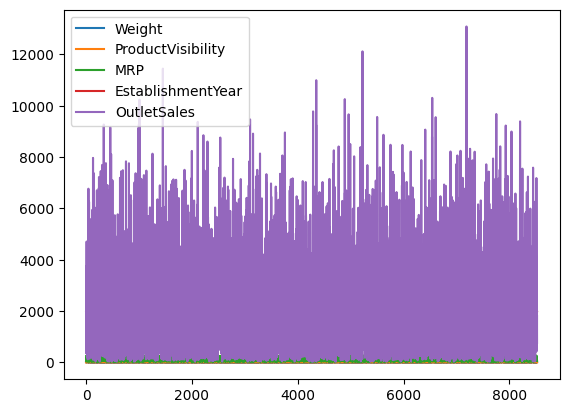

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Kita visualisasikan data agar dapat mempermudah memahami data, dengan matplotlib.pyplot inline berfungsi membuat area plot dalam gambar dengan bentuk plot statis. Dalam gambar terlihat bahwa outletsales terdapat jarak abnormal dari nilai - nilai lainnya, maka dari itu OutletSales terdapat outlier dan harus kita remove

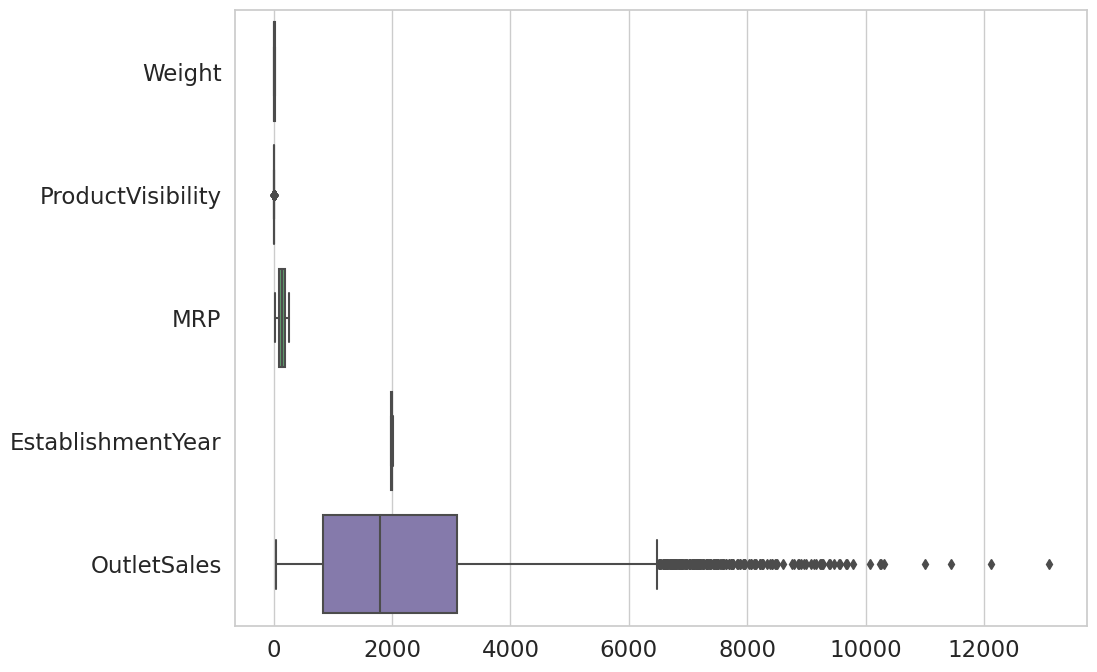

In [20]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Kemudian kita visualisasikan dalam bentuk boxplot

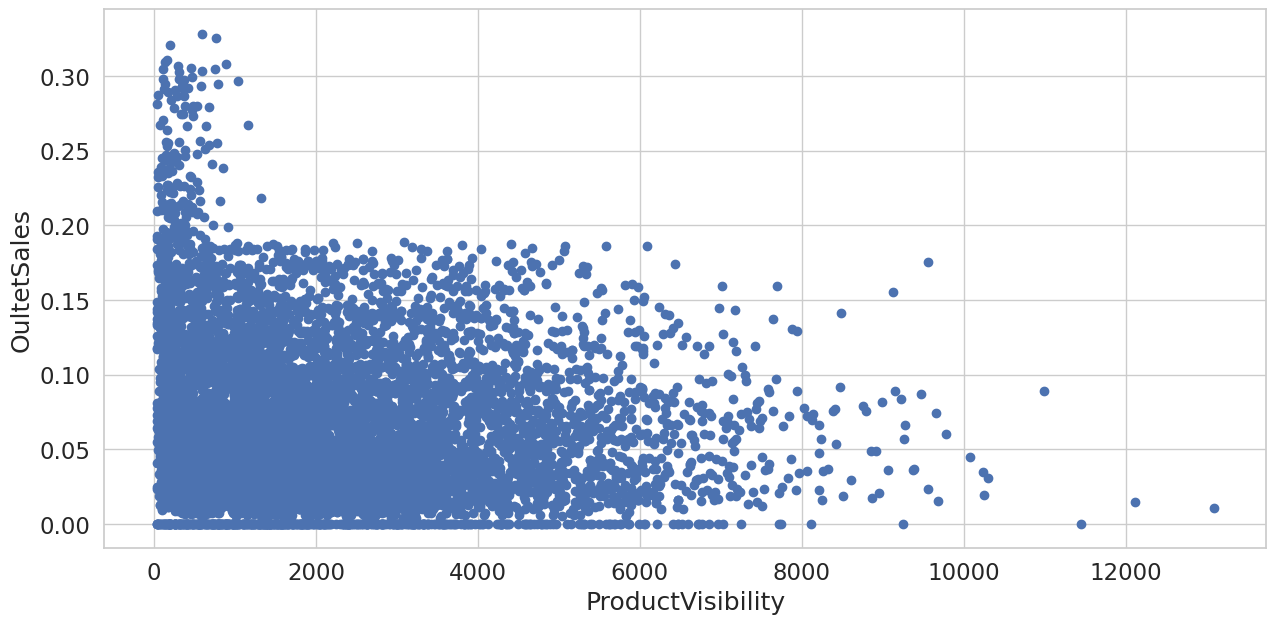

In [21]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['OutletSales'], dataset['ProductVisibility'])
 
# x-axis label
ax.set_xlabel('ProductVisibility')
 
# y-axis label
ax.set_ylabel('OultetSales')
plt.show()

Setelah itu dalam bentuk scatter

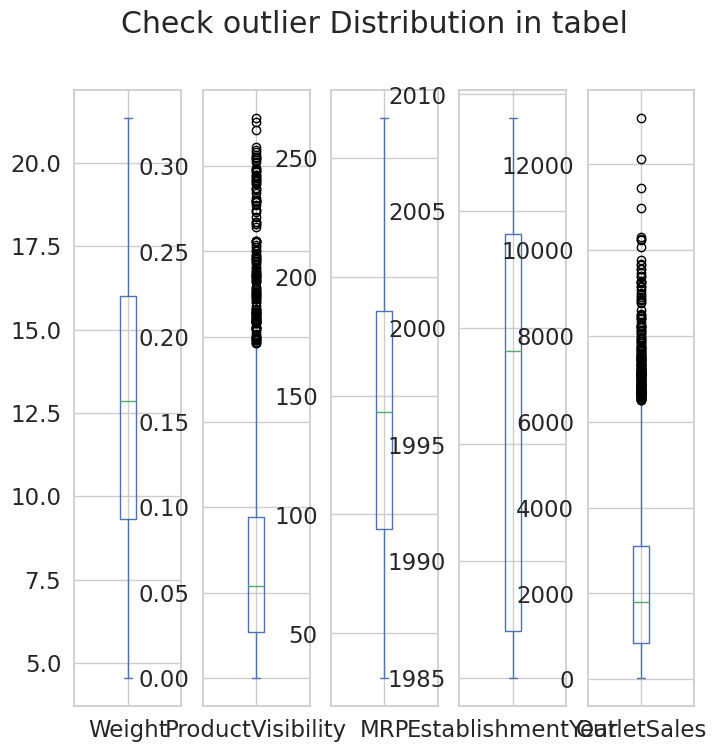

In [22]:
outlier = dataset[['Weight','ProductVisibility','MRP','EstablishmentYear','OutletSales']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,5),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')
plt.show()

dan dalam bentuk box

**Removing the outliers using IQR**

In [23]:
import sklearn

# IQR OutletSales
Q1 = np.percentile(dataset['OutletSales'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['OutletSales'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (8523, 11)


Setelah itu, hapus outlier menggunakan IQR dengan cara mengurangi quartil 1 dan quartil 3, kemudian didapatkan hasil bentuk lama (8523, 11)


In [24]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['OutletSales'] > upper].index
outliers_lower = dataset[dataset['OutletSales'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (8337, 11)


Kemudian menentukan rentang batas atas dan bawah, setelah itu menghaput outliner dan keluar output bentuk baru (8337, 11)

In [25]:
import sklearn

# IQR ProductVisibility
Q1 = np.percentile(dataset['ProductVisibility'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['ProductVisibility'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)


Old Shape:  (8337, 11)


Begitupun pada ProducctVisibility dengan bentuk lama (8337, 11)

In [26]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['ProductVisibility'] > upper].index
outliers_lower = dataset[dataset['ProductVisibility'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (8196, 11)


dan bentuk lama (8196,11)


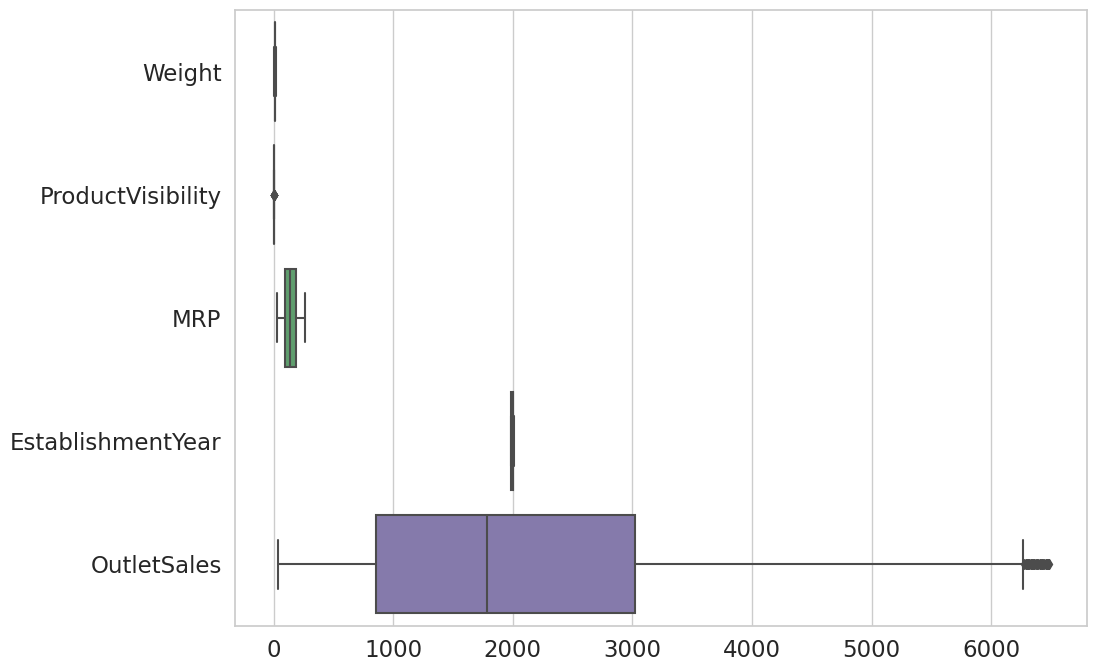

In [27]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Setelah mengapus outlier kemudian kita cek kembali dengan apakah masih terdapat outlier yang muncul dengan memvisualisasikan dataset dengan boxplot

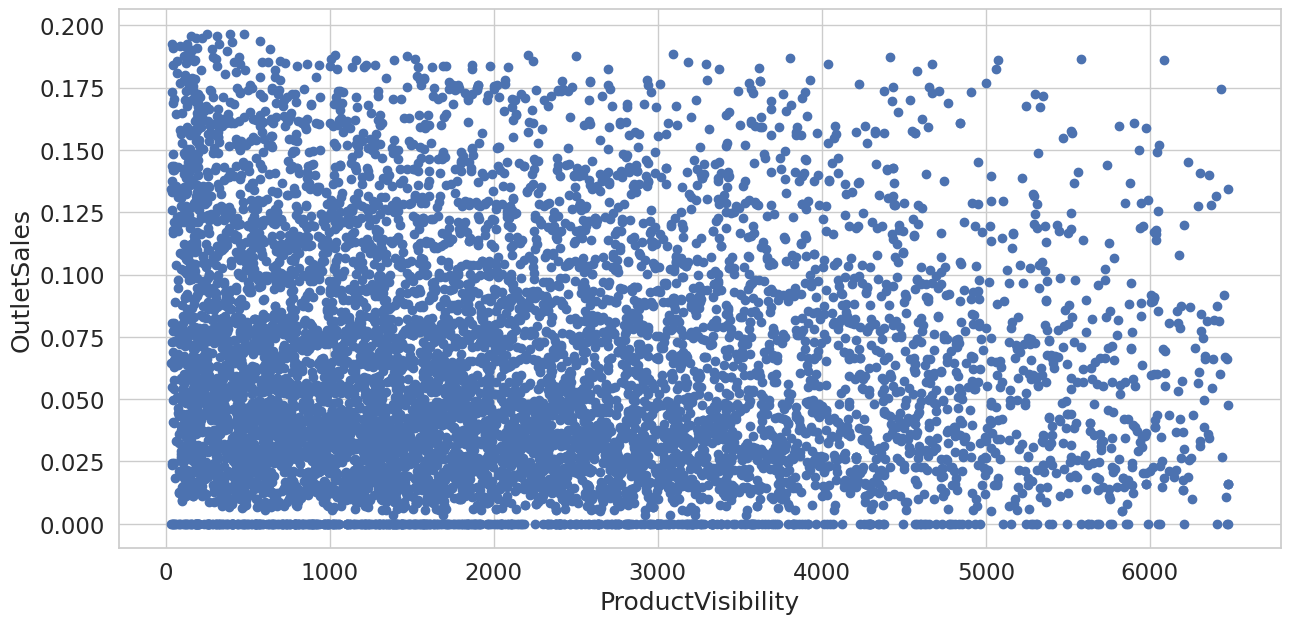

In [28]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['OutletSales'], dataset['ProductVisibility'])
 
# x-axis label
ax.set_xlabel('ProductVisibility')
 
# y-axis label
ax.set_ylabel('OutletSales')
plt.show()

Kemudian dengan scatter

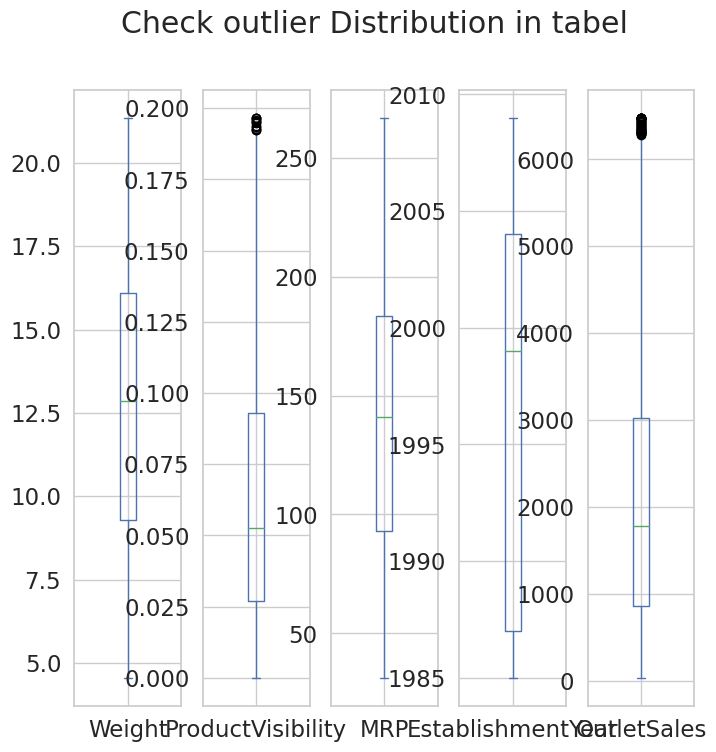

In [29]:
outlier = dataset[['Weight','ProductVisibility','MRP','EstablishmentYear','OutletSales']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,5),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')
plt.show()

Setelah itu dengan box

<Axes: >

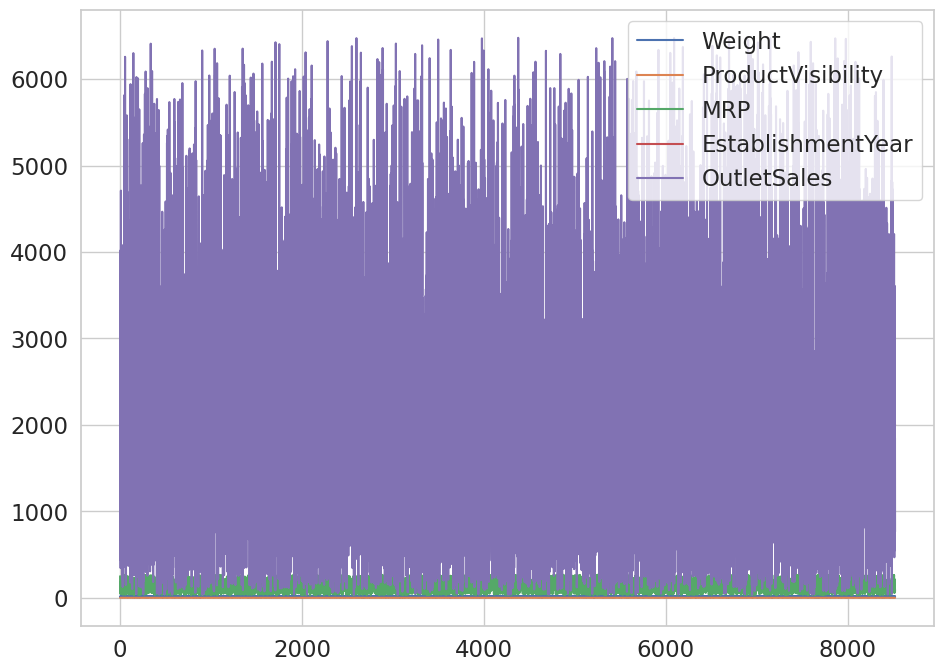

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

dan dalam bentuk inline, dari semua ggambar tersebut outlier sudah tidak terlalu signifikat jaraknya 

In [31]:
dataset2 = pd.get_dummies(dataset)
dataset2.head()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales,ProductID_DRA12,ProductID_DRA24,ProductID_DRA59,ProductID_DRB01,ProductID_DRB13,...,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


Kemudian kita ubah lagi setiap nilai didalam kolom menjadi kolom baru dan mengisi dengan nilai biner yaitu 0 dan 1 agar mempermudah memproses data 

In [32]:
lEncoder = LabelEncoder()
dataset['Weight'] = lEncoder.fit_transform(dataset['Weight'])
dataset['ProductVisibility'] = lEncoder.fit_transform(dataset['ProductVisibility'])
dataset['MRP'] = lEncoder.fit_transform(dataset['MRP'])
dataset['EstablishmentYear'] = lEncoder.fit_transform(dataset['EstablishmentYear'])
dataset['OutletSales'] = lEncoder.fit_transform(dataset['OutletSales'])


dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,LocationType,OutletType,OutletSales
0,FDA15,284,Low Fat,655,Dairy,5452,OUT049,4,Tier 1,Supermarket Type1,2521
1,DRC01,57,Regular,863,Soft Drinks,468,OUT018,8,Tier 3,Supermarket Type2,407
2,FDN15,376,Low Fat,705,Meat,2873,OUT049,4,Tier 1,Supermarket Type1,1620
3,FDX07,393,Regular,0,Fruits and Vegetables,4174,OUT010,3,Tier 3,Grocery Store,652
4,NCD19,265,Low Fat,0,Household,620,OUT013,1,Tier 3,Supermarket Type1,846


Jika kebingungan menggunakan cara diatas bisa menggunakan cara ini

**Correlation Matrix**

<ipython-input-33-b2f15a365735>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


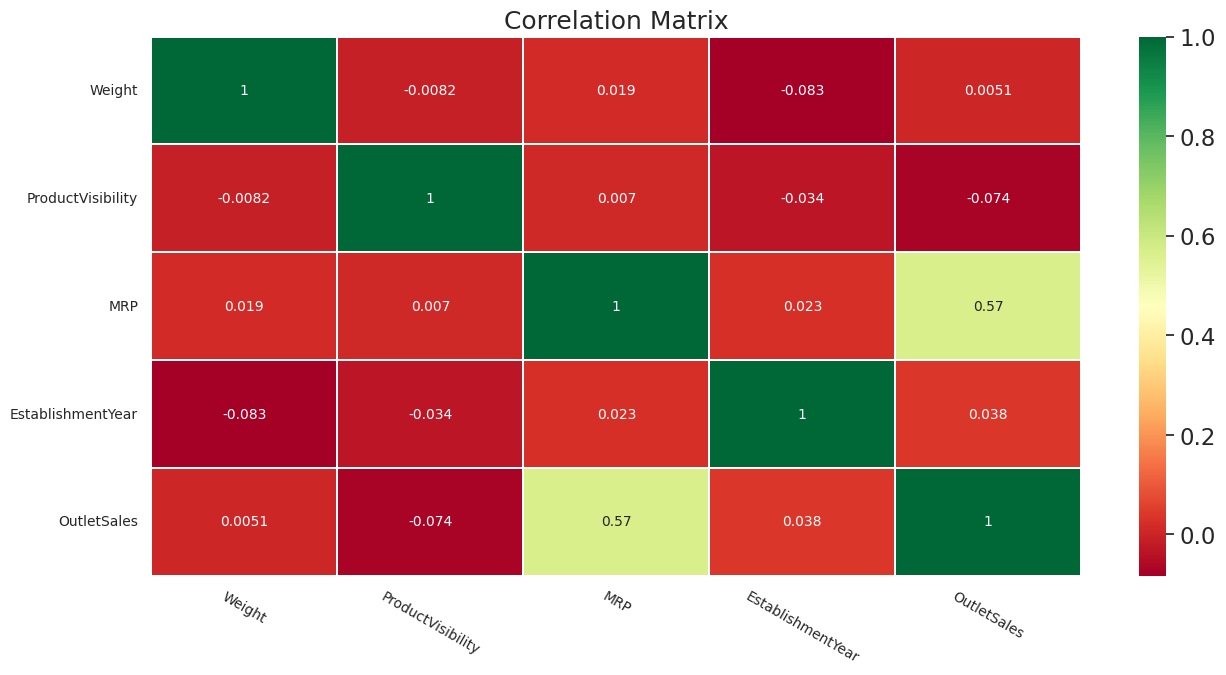

In [33]:
import seaborn as sns
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Kemudian kita cari corelation matrix, dimana -1 menunjukan korelasi linier negatif sempurna antar dua variabel, dan 0 tidak ada korelasi dan 1 merupakan korelasi linear positif sempurna

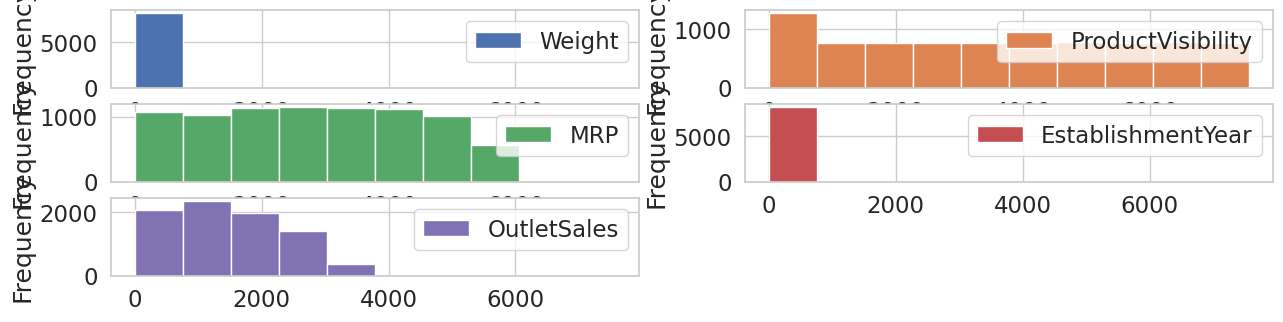

In [34]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Visualisasi data correlation matrx dalam bentuk histogram

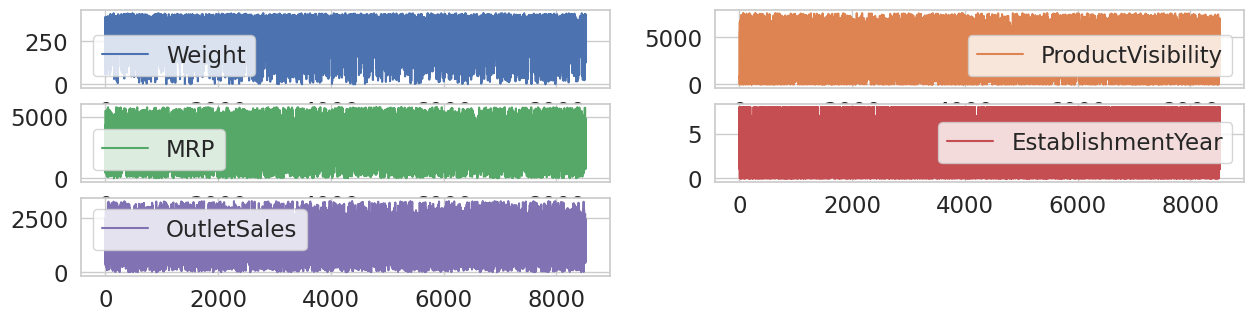

In [35]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Visualisasi data dalam bentuk matriks kolerasi dalam bentuk line 